<a href="https://colab.research.google.com/github/DiegoAT11/module1_activities_DiegoAguilarTorres/blob/main/EcobiciDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io

**EXTRACCIÓN**

In [2]:
url = "https://ecobici.cdmx.gob.mx/wp-content/uploads/2025/02/2025-01.csv"
csv_file_name = "2025-01.csv"

print(f"Descargando datos desde: {url}")
try:
  response = requests.get(url, timeout=1200)
  response.raise_for_status()
  print("Descarga completa con éxito.")

except requests.exceptions.Timeout as e:
  print(f"Error de timeout durante la descarga: {e}")
  df_raw = pd.DataFrame()
except requests.exceptions.RequestException as e:
  print(f"Error de timeout durante la descarga: {e}")
  df_raw = pd.DataFrame()

Descargando datos desde: https://ecobici.cdmx.gob.mx/wp-content/uploads/2025/02/2025-01.csv
Descarga completa con éxito.


In [3]:
#Mostrar tamaño del dataframe
with open(csv_file_name, "wb") as f:
  f.write(response.content)
print(f"Archivo CSV guardado como {csv_file_name}")

# Leer CSV en DataFrame
print(f"Leyendo datos desde: {csv_file_name}")
df_raw = pd.read_csv(csv_file_name)
print("Tamaño del dataframe")
print(df_raw.shape)

#Mostrar una preview de los datos
print("Preview del dataframe")
display(df_raw.head(50))

Archivo CSV guardado como 2025-01.csv
Leyendo datos desde: 2025-01.csv
Tamaño del dataframe
(1809775, 9)
Preview del dataframe


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17
5,M,24.0,7579436,222,31/12/2024,23:34:33,483,01/01/2025,00:01:58
6,M,31.0,7161920,034,31/12/2024,23:25:47,688,01/01/2025,00:02:16
7,M,22.0,7220593,254,31/12/2024,23:50:20,539,01/01/2025,00:02:41
8,M,29.0,4031258,560,31/12/2024,23:52:11,120,01/01/2025,00:03:28
9,F,24.0,6463376,560,31/12/2024,23:51:50,120,01/01/2025,00:03:31


**Transformación**

In [4]:
#Copia para no modificar el dataframe original
df = df_raw.copy()

print("\nTipos de datos antes de la conversión a datetime:")
print(df[['Fecha_Retiro', 'Fecha_Arribo']].dtypes)

#Nueva columna con fecha y hora en formato datetime
df["Retiro_Datetime"] = pd.to_datetime(df["Fecha_Retiro"] + " " + df["Hora_Retiro"], format="%d/%m/%Y %H:%M:%S")
df["Arribo_Datetime"] = pd.to_datetime(df["Fecha_Arribo"] + " " + df["Hora_Arribo"], format="%d/%m/%Y %H:%M:%S")

print(df[['Retiro_Datetime', 'Arribo_Datetime']].dtypes)

display(df.head())


Tipos de datos antes de la conversión a datetime:
Fecha_Retiro    object
Fecha_Arribo    object
dtype: object
Retiro_Datetime    datetime64[ns]
Arribo_Datetime    datetime64[ns]
dtype: object


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro_Datetime,Arribo_Datetime
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17


In [5]:
# Manejo de Valores Nulos
# Verificar valores nulos en todas las columnas
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())


Conteo de valores nulos por columna:
Genero_Usuario             1
Edad_Usuario             147
Bici                       0
Ciclo_Estacion_Retiro      0
Fecha_Retiro               0
Hora_Retiro                0
Ciclo_EstacionArribo       0
Fecha_Arribo               0
Hora_Arribo                0
Retiro_Datetime            0
Arribo_Datetime            0
dtype: int64


In [6]:
#Eliminar valores nulos en Edad_Usuario ya que es una porcion pequeña del dataset
df.dropna(subset=["Edad_Usuario"], inplace=True)
# Verificar valores nulos en todas las columnas
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())


Conteo de valores nulos por columna:
Genero_Usuario           0
Edad_Usuario             0
Bici                     0
Ciclo_Estacion_Retiro    0
Fecha_Retiro             0
Hora_Retiro              0
Ciclo_EstacionArribo     0
Fecha_Arribo             0
Hora_Arribo              0
Retiro_Datetime          0
Arribo_Datetime          0
dtype: int64


In [7]:
#Viajes por edad
df["Edad_Usuario"].value_counts().sort_index()

#Eliminamos usuarios con edad de 124, pues es un valor que se podría considerar erroneo
df.drop(df[df["Edad_Usuario"] == 124].index, inplace=True)

#Viajes por edad (124 eliminado)
df["Edad_Usuario"].value_counts().sort_index()

,count
Edad_Usuario,
16.0,440
17.0,1150
18.0,6671
19.0,15832
20.0,25255
...,...
94.0,8
99.0,20
100.0,1



Conteo de viajes por género:
Genero_Usuario
M    1252749
F     502211
O      34432
?      20192
Name: count, dtype: int64


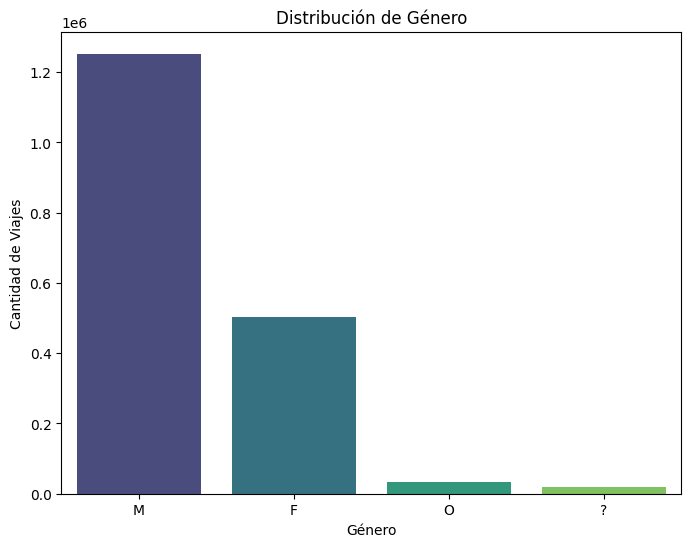

In [8]:
#Número de viajes por género
print("\nConteo de viajes por género:")
print(df["Genero_Usuario"].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Genero_Usuario", palette="viridis", hue="Genero_Usuario", legend=False)
plt.title("Distribución de Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de Viajes")
plt.show()

In [9]:
# Imputar valores "?" en la columna "Genero_Usuario" con la constante "O(Other)"
df["Genero_Usuario"] = df["Genero_Usuario"].replace("?", "O")

# Imprimir la cantidad de cada variable categórica en 'genero'
print("\nConteo de viajes por género:")
print(df["Genero_Usuario"].value_counts())


Conteo de viajes por género:
Genero_Usuario
M    1252749
F     502211
O      54624
Name: count, dtype: int64


In [10]:
#Aplicamos One-Hot Encoding a la columna "Genero_Usuario"
df_encoded = pd.get_dummies(df, columns=["Genero_Usuario"], prefix=["Genero_Usuario"])

# Mostrar las primeras filas del DataFrame codificado
print("\nDataFrame después de One-Hot Encoding:")
display(df_encoded.head())


DataFrame después de One-Hot Encoding:


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro_Datetime,Arribo_Datetime,Genero_Usuario_F,Genero_Usuario_M,Genero_Usuario_O
0,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,False,True,False
1,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,True,False,False
2,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,False,True,False
3,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,False,True,False
4,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,False,True,False


In [11]:
# --- Feature Engineering ---
print("\nIniciando Feature Engineering...")
# Crear nuevas características a partir de las existentes.


# 1. Duración del viaje en minutos
df_encoded["duracion_minutos"] = (df_encoded["Arribo_Datetime"] - df_encoded["Retiro_Datetime"]).dt.total_seconds() / 60

# 2. Día de la semana (0=Lunes, 6=Domingo)
df_encoded['dia_semana'] = df_encoded["Retiro_Datetime"].dt.dayofweek

# 3. Categoría de día (Fin de semana vs. Entre semana)
df_encoded['tipo_dia'] = df_encoded['dia_semana'].apply(lambda x: 'Fin de Semana' if x >= 5 else 'Entre Semana')


Iniciando Feature Engineering...


In [15]:
print("Nuevas características creadas: 'duracion_minutos', 'dia_semana', 'tipo_dia'.")
display(df_encoded.head())

Nuevas características creadas: 'duracion_minutos', 'dia_semana', 'tipo_dia'.


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro_Datetime,Arribo_Datetime,Genero_Usuario_F,Genero_Usuario_M,Genero_Usuario_O,duracion_minutos,dia_semana,tipo_dia
0,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,False,True,False,3.016667,1,Entre Semana
1,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,True,False,False,9.016667,1,Entre Semana
2,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,False,True,False,12.383333,1,Entre Semana
3,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,False,True,False,6.950000,1,Entre Semana
4,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,False,True,False,25.816667,1,Entre Semana


In [17]:

# --- Discretización ---
print("\nIniciando discretización de 'duracion_minutos'...")

# Definir los rangos y las etiquetas
bins = [0, 20, 40, 60, df_encoded["duracion_minutos"].max()]
labels = ["Viaje Corto", "Viaje Mediano", "Viaje Largo", "Viaje Muy Largo"]

# Aplicar la discretización
df_encoded["categoria_duracion"] = pd.cut(df_encoded["duracion_minutos"], bins=bins, labels=labels, right=False, include_lowest=True)
print("Columna 'categoria_duracion' creada.")

# Mostrar el conteo de valores en la nueva columna
print("\nConteo de viajes por categoría de duración:")
print(df_encoded["categoria_duracion"].value_counts())

# Mostrar las primeras filas con la nueva columna
print("\nPrevisualización del DataFrame con la nueva columna:")
display(df_encoded.head())



Iniciando discretización de 'duracion_minutos'...
Columna 'categoria_duracion' creada.

Conteo de viajes por categoría de duración:
categoria_duracion
Viaje Corto        1364791
Viaje Mediano       391557
Viaje Largo          46208
Viaje Muy Largo       7027
Name: count, dtype: int64

Previsualización del DataFrame con la nueva columna:


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro_Datetime,Arribo_Datetime,Genero_Usuario_F,Genero_Usuario_M,Genero_Usuario_O,duracion_minutos,dia_semana,tipo_dia,categoria_duracion
0,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,False,True,False,3.016667,1,Entre Semana,Viaje Corto
1,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,True,False,False,9.016667,1,Entre Semana,Viaje Corto
2,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,False,True,False,12.383333,1,Entre Semana,Viaje Corto
3,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,False,True,False,6.950000,1,Entre Semana,Viaje Corto
4,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,False,True,False,25.816667,1,Entre Semana,Viaje Mediano


**Carga(Load)**

In [18]:
# FASE 3: CARGA (Load)

print("\n--- FASE 3: CARGA ---")

if not df_encoded.empty:
    # El paso final es cargar nuestros datos limpios y enriquecidos a un nuevo destino.
    # Opción 1: Guardar como un nuevo archivo CSV.
    try:
        df_encoded.to_csv("viajes_ecobici_cdmx_limpios.csv", index=False)
        print("DataFrame transformado guardado exitosamente en 'viajes_ecobici_cdmx_limpios.csv'")
    except Exception as e:
        print(f"Error al guardar el archivo CSV: {e}")

    # Opción 2 (Recomendada para Big Data): Guardar en formato Parquet.
    # Parquet es un formato columnar optimizado para análisis, es más rápido y ocupa menos espacio.
    try:
        # Necesitarás instalar 'pyarrow' o 'fastparquet': pip install pyarrow
        df_encoded.to_parquet("viajes_ecobici_cdmx_limpios.parquet", index=False)
        print("DataFrame transformado guardado exitosamente en 'viajes_ecobici_cdmx_limpios.parquet'")
    except ImportError:
        print("\nPara guardar en formato Parquet, necesitas instalar 'pyarrow'.")
        print("Ejecuta: pip install pyarrow")
    except Exception as e:
        print(f"Error al guardar el archivo Parquet: {e}")


--- FASE 3: CARGA ---
DataFrame transformado guardado exitosamente en 'viajes_ecobici_cdmx_limpios.csv'
DataFrame transformado guardado exitosamente en 'viajes_ecobici_cdmx_limpios.parquet'
